In [1]:
import MLMarker_app
import pandas as pd
import numpy as np
from MLMarker_app import MLMarker
import matplotlib.pyplot as plt
import random

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [41]:
df = pd.read_csv('/home/compomics/git/MLMarker/Projects/Andrea/All_proteins_PART.csv')
data_list = df.values.tolist()
data_list = [i[0] for i in data_list]

In [42]:
df = pd.DataFrame([1]*len(data_list), index=data_list).T
df

,A8K2U0,O14732,O14818,O43548,O60911,O75131,O75223,O75342,O75369,O75635,...,Q9NZT1,Q9UBC9,Q9UGM3,Q9UI42,Q9UIV8,Q9UJ70,Q9UKK9,Q9Y2T3,Q9Y337,Q9Y3R4
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [43]:
test = MLMarker(df.iloc[0:1,:], binary = True)
prediction = MLMarker.predict_top_tissues(test)
prediction

Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


[('Pancreas', 0.178),
 ('Monocytes', 0.1358),
 ('B-cells', 0.0697),
 ('Testis', 0.0519),
 ('Salivary gland', 0.0473)]

In [44]:
shap_df = MLMarker.shap_values_df(test, n_preds=5).reset_index()
shap_df

,tissue,A0A075B6H7,A0A075B6I0,A0A075B6Q5,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,A0A0B4J1V0,A0A0B4J1V6,A0A0B4J1X8,...,Q9Y6U3,Q9Y6V0,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8
0,Pancreas,0.000002,0.000042,0.000003,0.000010,0.000004,1.166401e-06,0.000004,0.000000e+00,2.037355e-06,...,0.000015,0.000127,0.000139,0.000000e+00,0.000000,0.000000,1.000880e-06,0.0,0.0,0.0
1,Monocytes,0.000000,0.000053,0.000028,0.000002,0.000002,5.965932e-07,0.000000,0.000000e+00,3.668685e-07,...,0.000005,0.000197,0.000000,0.000000e+00,0.000000,0.000017,0.000000e+00,0.0,0.0,0.0
2,B-cells,0.000000,0.000012,0.000021,0.000000,0.000002,0.000000e+00,0.000002,0.000000e+00,0.000000e+00,...,0.000001,0.000053,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0
3,Testis,0.000000,0.000010,0.000004,0.000011,0.000003,3.437714e-06,-0.000001,2.006309e-07,3.195501e-06,...,0.000005,0.000013,0.000008,6.043326e-07,0.000017,0.000000,3.260984e-07,0.0,0.0,0.0
4,Salivary gland,0.000000,0.000018,0.000005,0.000012,0.000010,5.746592e-07,0.000001,0.000000e+00,7.971694e-07,...,0.000007,0.000033,0.000000,0.000000e+00,0.000000,0.000000,1.346548e-06,0.0,0.0,0.0


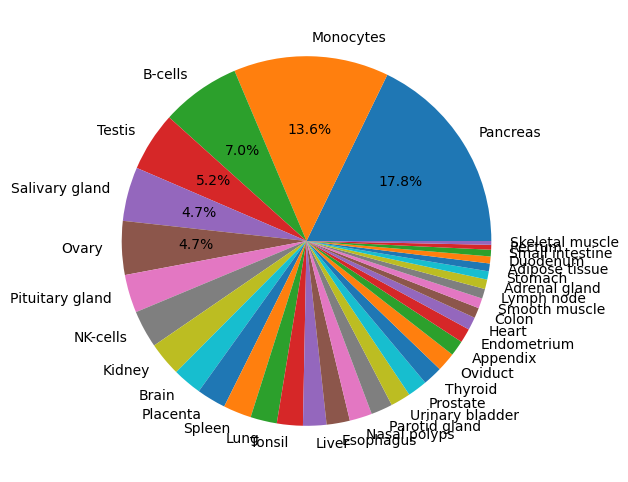

In [45]:
MLMarker.pie_chart_predictions(test)

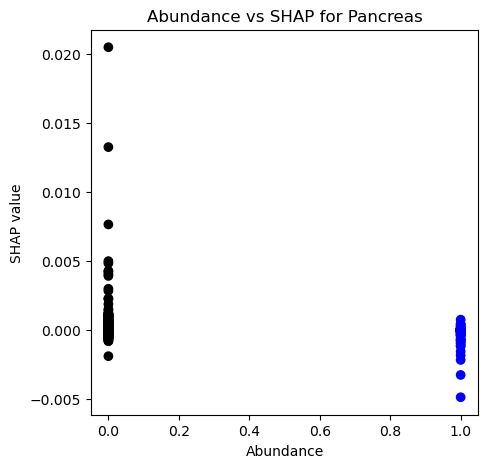

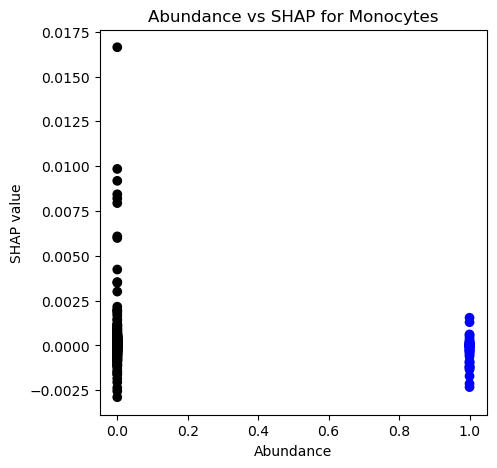

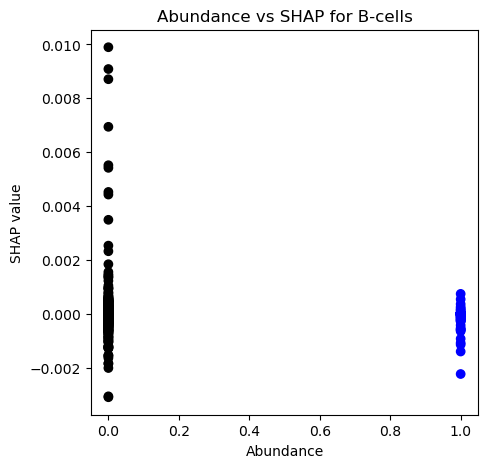

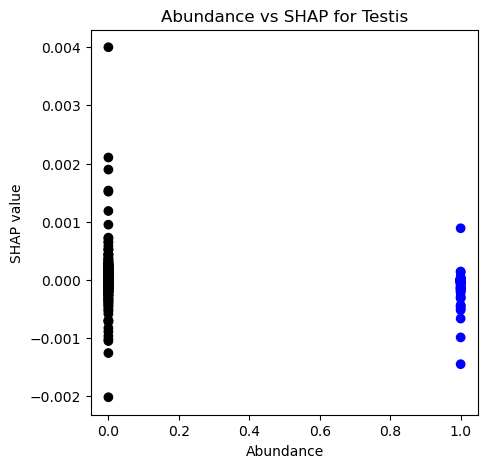

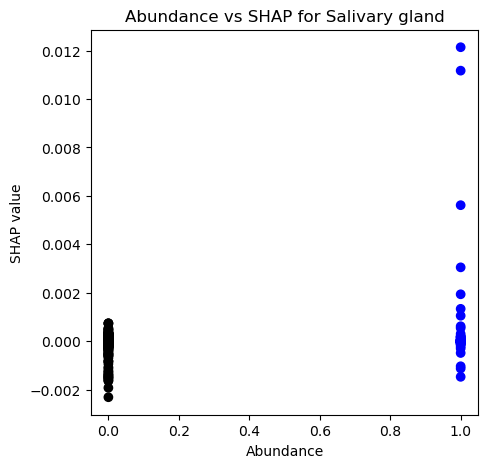

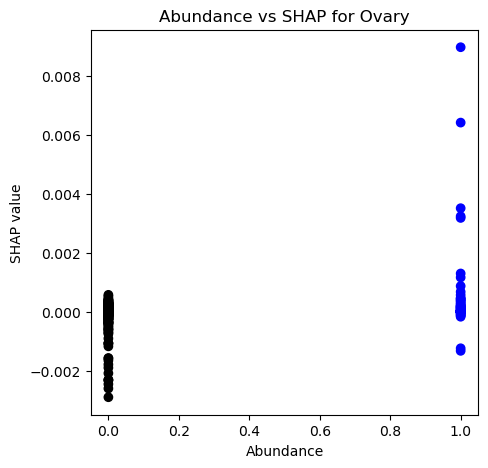

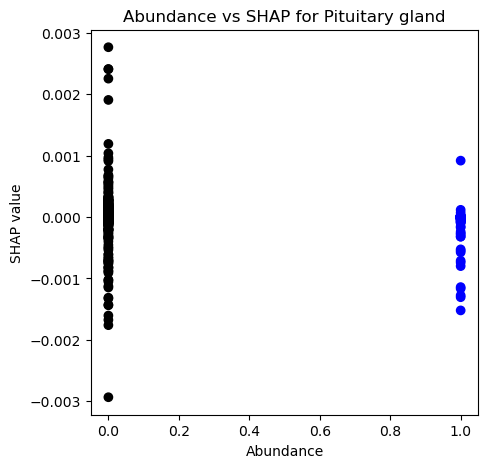

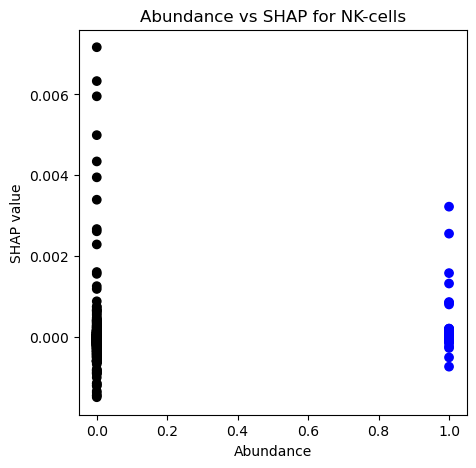

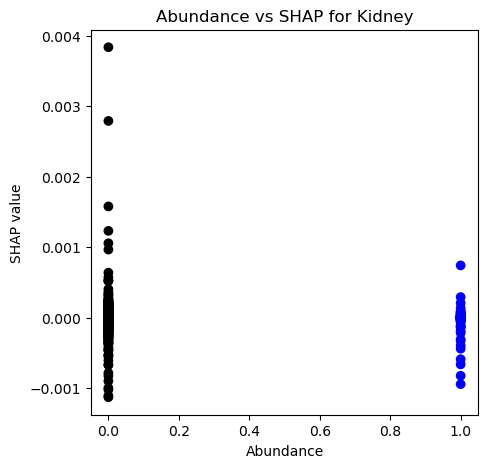

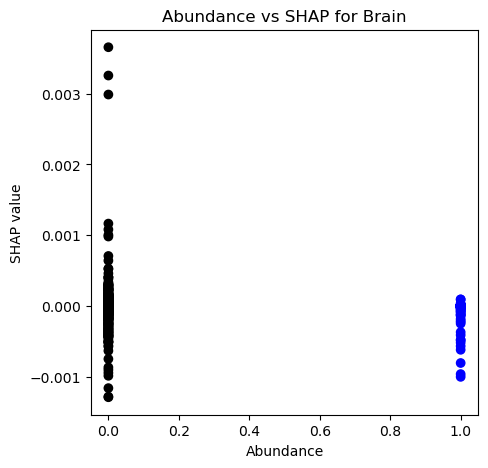

In [46]:
MLMarker.shap_abundance_distribution(test, n_preds=10)

The base value is 0.02857142857142838
Monocytes


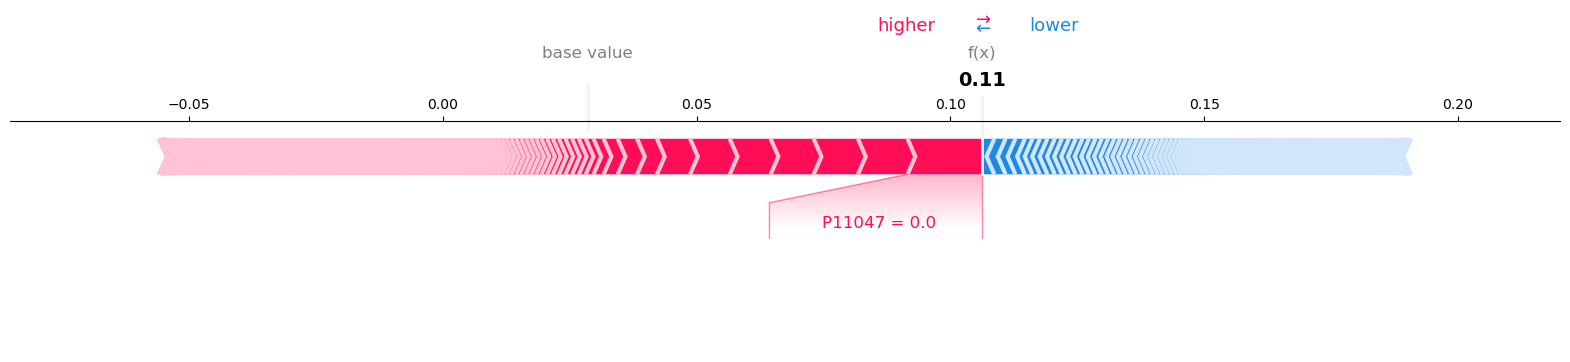

None

Ovary


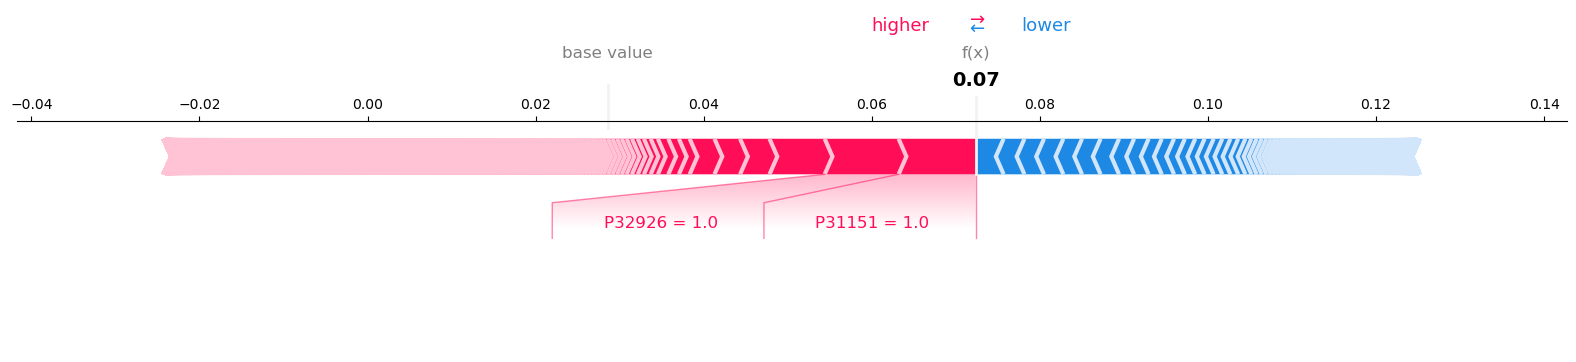

None

Pancreas


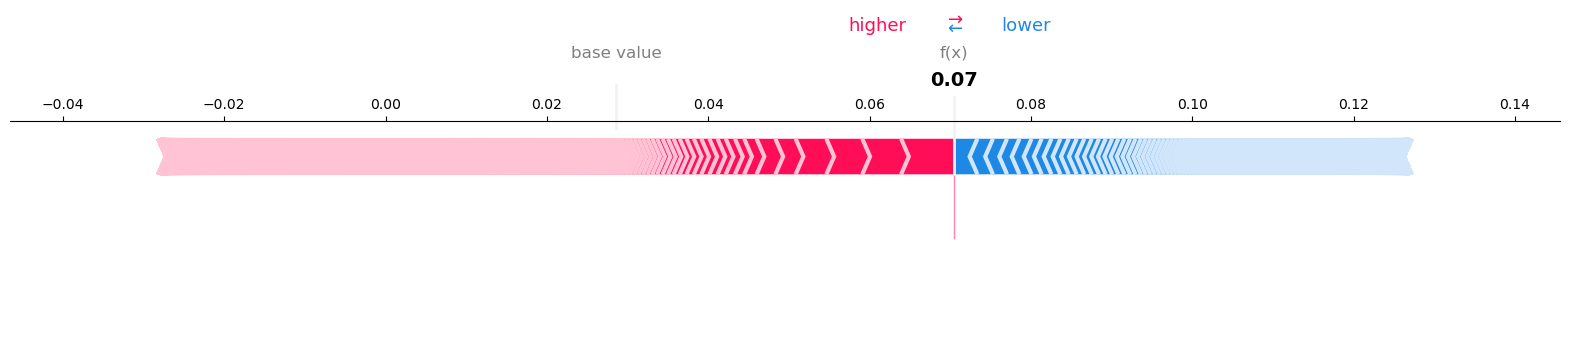

None

B-cells


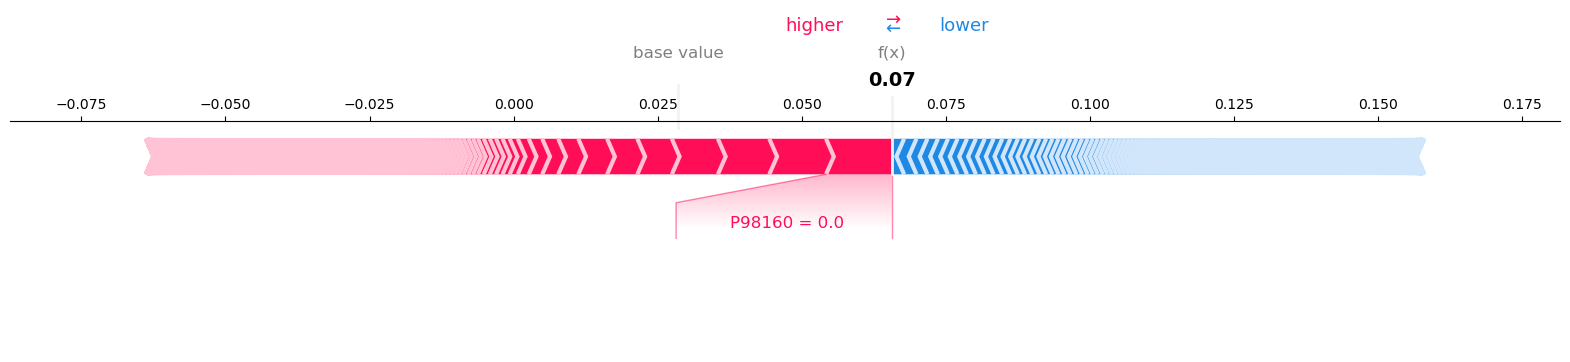

None

Salivary gland


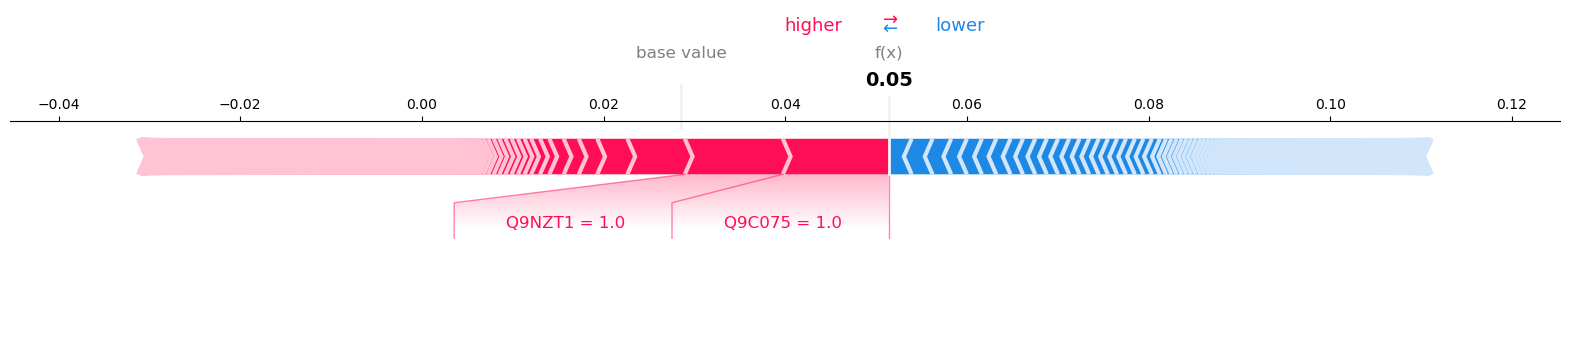

None

Tonsil


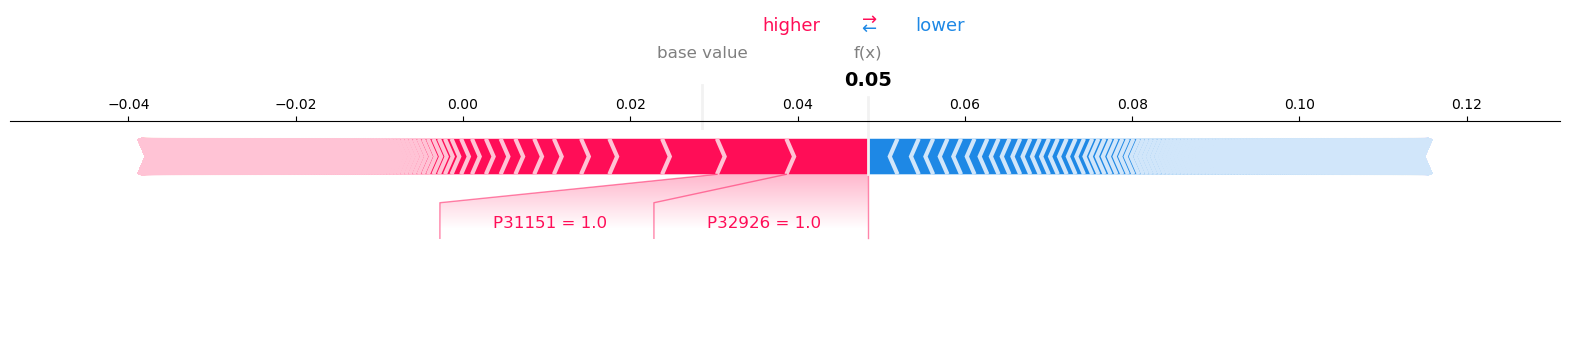

None

Esophagus


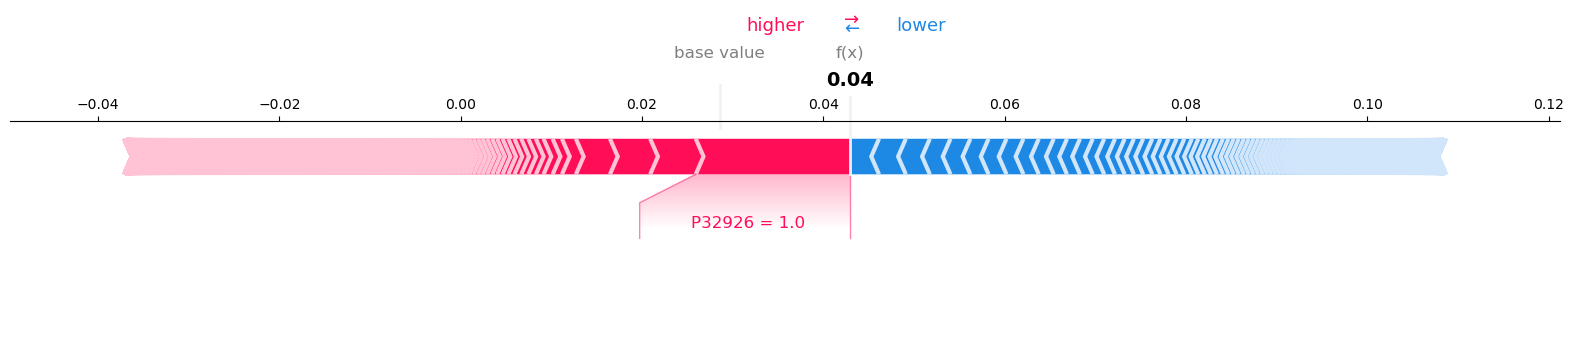

None

Testis


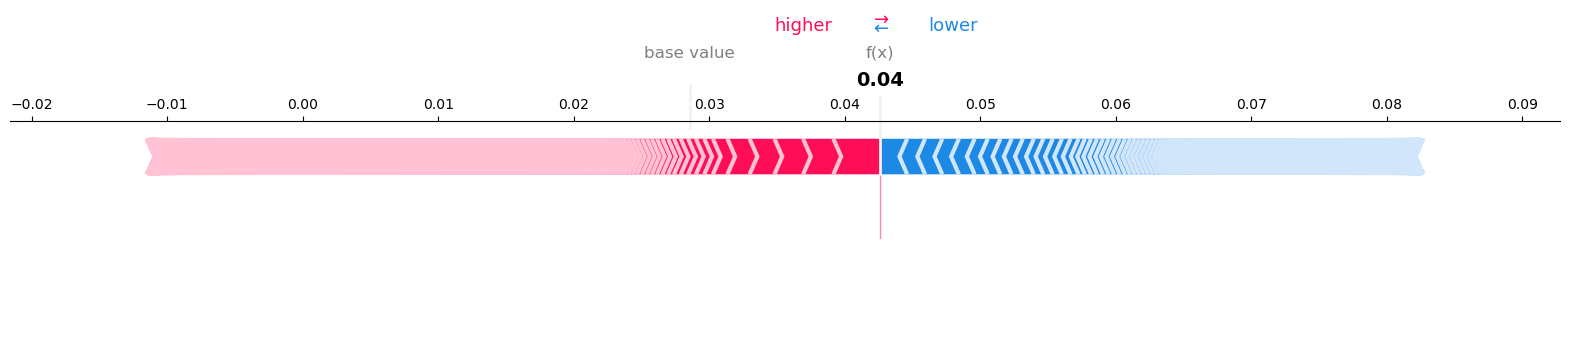

None

Nasal polyps


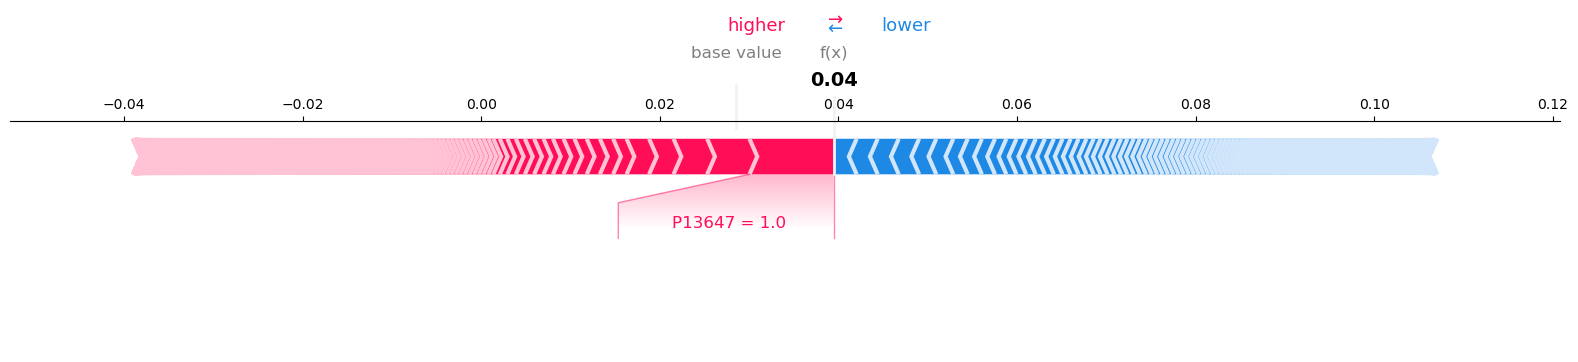

None

Lung


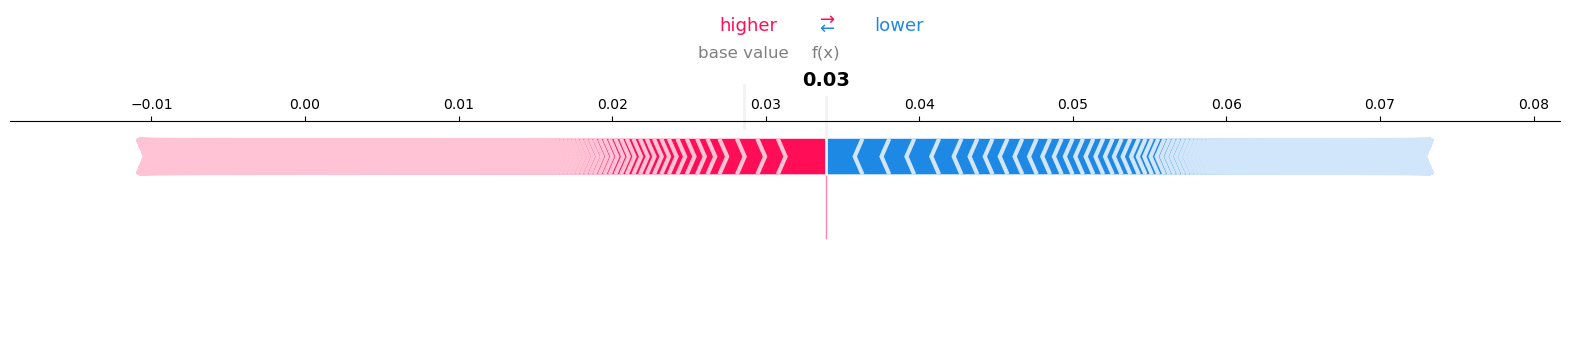

None

In [8]:
MLMarker.visualize_shap_force_plot(test, n_preds=10) 

In [47]:
shap_df = MLMarker.shap_values_df(test, n_preds=15) 
shap_df_filt = shap_df.filter(items=df.columns.tolist())
shap_df_t = shap_df_filt.T


In [48]:
row_sum = shap_df.sum(axis=1)

In [49]:
prediction = MLMarker.predict_top_tissues(test, n_preds=15)

In [50]:
shap_df['positive_sum'] = shap_df[shap_df > 0].sum(axis=1)
shap_df['negative_sum'] = shap_df[shap_df < 0].sum(axis=1)
shap_df
row_sum = shap_df.sum(axis=1)
prediction = MLMarker.predict_top_tissues(test, n_preds=15)
comparison = pd.DataFrame(columns=['Tissue', 'Present', 'Absent', 'Ratio', 'Probability', 'Metric', ' SHAP sum', 'SHAP_sum - base value' ,'Metric_SHAP', 'Positive_present_sum', 'Negative__absent_sum'])
row_sum = shap_df.sum(axis=1)
base_value = 0.028
for i in shap_df_t.columns:
    prob = [tup[1] for tup in prediction if tup[0] == i][0]
    present = len(shap_df_t[shap_df_t[i]>0].index)
    absent = (shap_df.loc[i] > 0).sum() - present
    ratio = present/(present+absent)
    metric = ratio*prob*100
    shap_sum = row_sum[i] 
    shap_sum_base = shap_sum - base_value
    if shap_sum_base < 0:
        shap_sum_base = 0
    if shap_sum < 0:
        shap_sum = 0
    metric_shap = metric * shap_sum_base *100
    positive_sum = shap_df.loc[i, 'positive_sum']
    negative_sum = shap_df.loc[i, 'negative_sum']
    positive_present = positive_sum * present
    negative_absent = negative_sum * absent
    comparison.loc[i] = [i, present, absent, ratio, prob*100, metric, shap_sum,  shap_sum_base, metric_shap, positive_present, negative_absent]

In [51]:
comparison

,Tissue,Present,Absent,Ratio,Probability,Metric,SHAP sum,SHAP_sum - base value,Metric_SHAP,Positive_present_sum,Negative__absent_sum
Pancreas,Pancreas,27,1806,0.014730,17.80,0.262193,0.298805,0.270805,7.100321,5.664610,-109.078561
Monocytes,Monocytes,18,967,0.018274,13.58,0.248162,0.214368,0.186368,4.624958,3.551129,-87.127531
B-cells,B-cells,14,1002,0.013780,6.97,0.096043,0.082187,0.054187,0.520427,1.979159,-100.475705
Testis,Testis,17,1849,0.009110,5.19,0.047283,0.046700,0.018700,0.088418,1.087358,-75.092373
Salivary gland,Salivary gland,40,1381,0.028149,4.73,0.133146,0.037358,0.009358,0.124595,3.180282,-84.003690
Ovary,Ovary,66,1660,0.038239,4.70,0.179722,0.036763,0.008763,0.157499,4.902054,-92.780408
Pituitary gland,Pituitary gland,19,1474,0.012726,3.34,0.042505,0.009595,0.000000,0.000000,1.223835,-87.872578
NK-cells,NK-cells,37,857,0.041387,3.28,0.135749,0.008414,0.000000,0.000000,3.434988,-75.956564
Kidney,Kidney,43,1291,0.032234,2.98,0.096057,0.002455,0.000000,0.000000,1.983216,-57.958074
Brain,Brain,27,1427,0.018569,2.55,0.047352,0.000000,0.000000,0.000000,1.337026,-74.991004


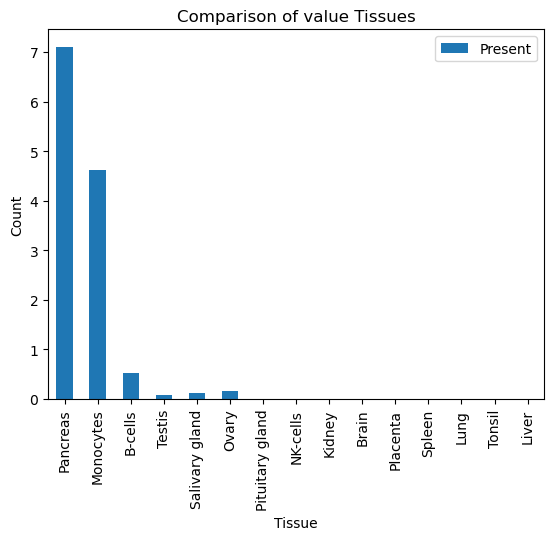

In [52]:
comparison.plot.bar(x='Tissue', y=['Metric_SHAP'], stacked=True)
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Comparison of value Tissues')
plt.legend(['Present', 'Absent'])
plt.show()


In [18]:
shap_df_t.sort_values(by='Ovary', ascending=False).head(10)

tissue,Monocytes,Ovary,Pancreas,B-cells,Salivary gland,Tonsil,Esophagus,Testis,Nasal polyps,Lung,Prostate,Urinary bladder,Parotid gland,Brain,Kidney
P31151,-0.001252,0.009163,-0.001113,-0.001243,-0.001238,0.008305,0.000086,-0.000277,-0.000461,-0.000866,-0.000856,-0.000055,0.000533,-0.000476,-0.000226
P32926,-0.002380,0.008796,-0.001498,-0.001249,-0.002061,0.009756,0.017053,-0.001267,-0.002578,0.003148,-0.002238,-0.002249,-0.001645,-0.001118,-0.000677
Q9NZT1,-0.001462,0.006565,-0.000797,-0.001747,0.010790,0.006304,-0.000889,-0.000125,-0.001617,-0.001456,-0.001906,-0.000819,0.004091,-0.000762,-0.000372
Q13835,-0.001101,0.003501,-0.001032,-0.001033,0.001660,0.001762,0.005027,-0.000831,-0.000882,0.001336,0.004360,-0.000919,-0.001059,-0.000445,-0.000655
P20930,-0.001128,0.003047,0.000447,-0.000547,-0.001656,0.000473,-0.001407,0.000182,-0.001134,-0.000976,0.000076,-0.000707,-0.000577,-0.000449,0.000405
P29508,-0.001297,0.002949,-0.001214,-0.000607,-0.001066,-0.001133,0.003754,-0.000679,0.004738,-0.000080,0.000508,0.007485,-0.000409,-0.000442,-0.000487
P02538,-0.000263,0.001286,-0.000338,0.000767,-0.000171,0.001149,0.001005,-0.000250,0.001224,-0.000096,-0.000078,0.000102,0.001146,-0.000122,-0.000015
Q9C075,-0.002220,0.001254,-0.002903,-0.001502,0.011644,-0.000446,-0.003161,-0.001322,-0.000399,-0.002357,0.003880,-0.001594,0.008822,-0.000996,-0.000462
Q5D862,-0.000002,0.001243,-0.000079,-0.000009,-0.000210,-0.000157,-0.000481,-0.000140,-0.000053,-0.000039,0.000031,-0.000297,-0.000096,0.000028,-0.000040
P31944,-0.000429,0.000861,-0.000034,0.000362,-0.000018,0.000000,-0.000055,-0.000040,0.000000,-0.000124,-0.000055,-0.000041,-0.000029,-0.000027,-0.000028


In [21]:
#top 10 highest shap values for Ovary, Salivary gland and Tonsil
top10_ovary = shap_df_t.sort_values(by='Ovary', ascending=False).head(10).index

top10_saliva = shap_df_t.sort_values(by='Salivary gland', ascending=False).head(10).index
top10_tonsil = shap_df_t.sort_values(by='Tonsil', ascending=False).head(10).index


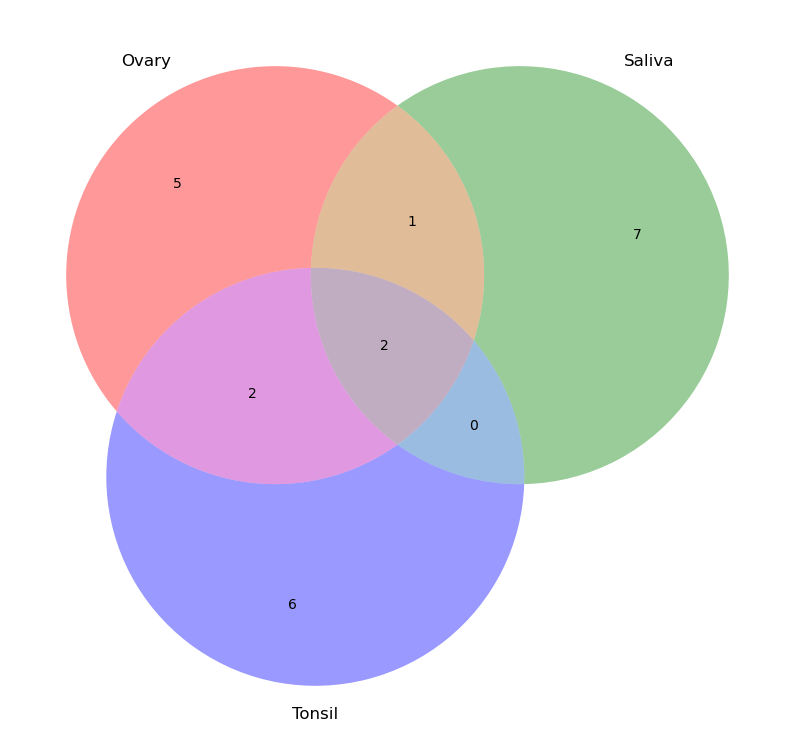

In [24]:
#venn diagram of top10
from matplotlib_venn import venn3
plt.figure(figsize=(10,10))
venn3([set(top10_ovary), set(top10_saliva), set(top10_tonsil)], ('Ovary', 'Saliva', 'Tonsil'))
plt.show()

In [26]:
set(top10_ovary)|set(top10_saliva)|set(top10_tonsil)

{'P01833',
 'P02538',
 'P05976',
 'P08729',
 'P12273',
 'P13647',
 'P18510',
 'P19013',
 'P20930',
 'P29508',
 'P31151',
 'P31944',
 'P32926',
 'P35030',
 'Q13835',
 'Q14134',
 'Q5D862',
 'Q6KB66',
 'Q6UWP8',
 'Q8WVV4',
 'Q9C075',
 'Q9HC84',
 'Q9NZT1'}

In [28]:
shap_df_t.sort_values(by='Lung', ascending=False).head(15).index

Index(['P32926', 'Q13835', 'Q9HC84', 'P01833', 'P08729', 'O95171', 'Q8WVV4',
       'Q15646', 'P08727', 'P20742', 'P31947', 'P19013', 'P51884', 'P02790',
       'P36952'],
      dtype='object')

In [29]:
shap_df_t.sort_values(by='Lung', ascending=True).head(5)

tissue,Monocytes,Ovary,Pancreas,B-cells,Salivary gland,Tonsil,Esophagus,Testis,Nasal polyps,Lung,Prostate,Urinary bladder,Parotid gland,Brain,Kidney
Q9C075,-0.002220,0.001254,-0.002903,-0.001502,0.011644,-0.000446,-0.003161,-0.001322,-0.000399,-0.002357,0.003880,-0.001594,0.008822,-0.000996,-0.000462
Q9NZT1,-0.001462,0.006565,-0.000797,-0.001747,0.010790,0.006304,-0.000889,-0.000125,-0.001617,-0.001456,-0.001906,-0.000819,0.004091,-0.000762,-0.000372
P20930,-0.001128,0.003047,0.000447,-0.000547,-0.001656,0.000473,-0.001407,0.000182,-0.001134,-0.000976,0.000076,-0.000707,-0.000577,-0.000449,0.000405
P31151,-0.001252,0.009163,-0.001113,-0.001243,-0.001238,0.008305,0.000086,-0.000277,-0.000461,-0.000866,-0.000856,-0.000055,0.000533,-0.000476,-0.000226
Q14117,-0.001932,-0.001290,-0.001540,-0.001405,-0.000940,-0.000437,-0.001017,-0.000297,-0.000682,-0.000674,0.004353,-0.000037,-0.000939,0.001829,0.008032


In [31]:
#target proteins from andrea
MPM_LC_AEX_HC_partial = ['P00441', 'P81605', 'Q8WZ42']
AEX_HC_partial = ['P01037', 'P02768', 'P04080', 'P23526', 'P28072', 'P49862', 'Q6ZVX7', 'Q7Z3Y7', 'Q8WZ42', 'Q96DA0', 'Q96DR5', 'Q96DR8', 'Q9UBC9']
MPM_AEX_partial = ['P00441', 'P01037', 'P01040', 'P01834', 'P0DOX7', 'P02768', 'P12273', 'P20073', 'P23490', 'P31025', 'P40926', 'Q16610', 'Q5T750', 'Q8N1N4', 'Q8WZ42', 'Q96DA0', 'Q99456', 'Q9NP55']
MPM_AEX_HC_partial = ['O95969', 'P23490', 'Q8WZ42', 'Q9HCY8']
MPM_LC_AEX_partial = ['P00441', 'P01037', 'P01040', 'P12273', 'P31025', 'Q96DA0']

MPM_LC_AEX_HC_FULL = ['P00441', 'P09228', 'P81605', 'Q8WZ42']
AEX_HC_FULL = ['P01036', 'P01037', 'P06870', 'P09228', 'P23526', 'P28072', 'P49862', 'Q7Z3Y7', 'Q96DA0', 'Q96DR5', 'Q96DR8']
MPM_AEX_FULL = ['O15020', 'P00441', 'P01037', 'P01040', 'P01834','P0DOX7', 'P02768', 'P04080', 'P09228', 'P12273', 'P23490', 'P31025', 'P40926', 'Q16610', 'Q5T750', 'Q8N1N4', 'Q8WZ42', 'Q96DA0', 'Q99456', 'Q9NP55']
MPM_AEX_HC_FULL = ['O15020', 'O95969', 'P00441', 'P23490', 'Q8WZ42', 'Q9HCY8']
MPM_LC_AEX_FULL = ['P00441', 'P01037', 'P01040', 'P09228', 'P12273', 'P31025', 'P81605']

In [38]:
FULL_targets = MPM_LC_AEX_HC_FULL + AEX_HC_FULL + MPM_AEX_FULL + MPM_AEX_HC_FULL + MPM_LC_AEX_FULL
len(FULL_targets)

48

In [37]:
shap_df_t[shap_df_t.index.isin(FULL_targets)][['Monocytes', 'Ovary', 'Pancreas', 'B-cells', 'Salivary gland', 'Tonsil', 'Lung']]

tissue,Monocytes,Ovary,Pancreas,B-cells,Salivary gland,Tonsil,Lung
O15020,-0.000487,2.658304e-04,6.016938e-05,-0.000213,3.833827e-04,0.000010,0.000149
P00441,0.000330,-4.878102e-07,1.421438e-06,0.000009,-2.481770e-05,0.000002,-0.000030
P04080,0.000011,0.000000e+00,0.000000e+00,-0.000015,0.000000e+00,0.000000,0.000000
P12273,-0.001245,2.786879e-04,-5.934118e-04,0.000068,3.315707e-03,-0.000233,-0.000582
P23526,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
P28072,0.000000,-6.475250e-07,2.105413e-04,-0.000098,4.024251e-06,0.000006,0.000004
P40926,0.000000,2.173769e-06,-8.076107e-07,0.000000,3.420550e-07,0.000001,0.000001
P81605,0.000000,9.274003e-05,-1.628275e-06,0.000000,-1.170791e-05,0.000000,-0.000001
Q16610,0.000000,1.298588e-06,-3.956963e-06,-0.000003,-7.430122e-06,0.000000,-0.000010
Q8N1N4,-0.000016,3.668452e-04,7.306396e-05,0.000006,-6.931447e-05,0.000060,-0.000084


<Axes: xlabel='tissue'>

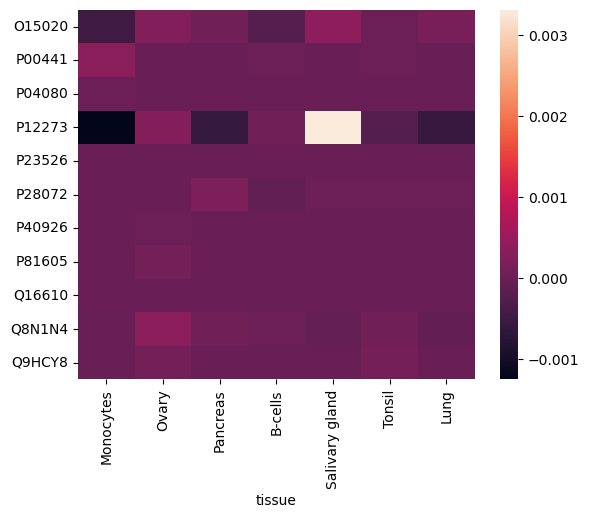

In [40]:
import seaborn as sns
sns.heatmap(shap_df_t[shap_df_t.index.isin(FULL_targets)][['Monocytes', 'Ovary', 'Pancreas', 'B-cells', 'Salivary gland', 'Tonsil', 'Lung']])